# 1.Data loading and description

In [270]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter

In [272]:
cancer = pd.read_csv("C:/Users/Admin/Desktop/Data Scince Insaid/ML2/PCA/cancer.csv")
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [273]:
cancer.shape

(569, 33)

In [46]:
cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [47]:
cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [50]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

# 2. Exploratory Data Analysis

In [48]:
cancer.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [49]:
Total = cancer['diagnosis'].count()
malignant = cancer[cancer['diagnosis'] == "M"]['diagnosis'].count()
print("Total:",Total)
print("Malignant: ", malignant)
print("Benign: ", Total - malignant)

Total: 569
Malignant:  212
Benign:  357


In [653]:
print(cancer.isnull().sum().any())

False


<Figure size 360x360 with 0 Axes>

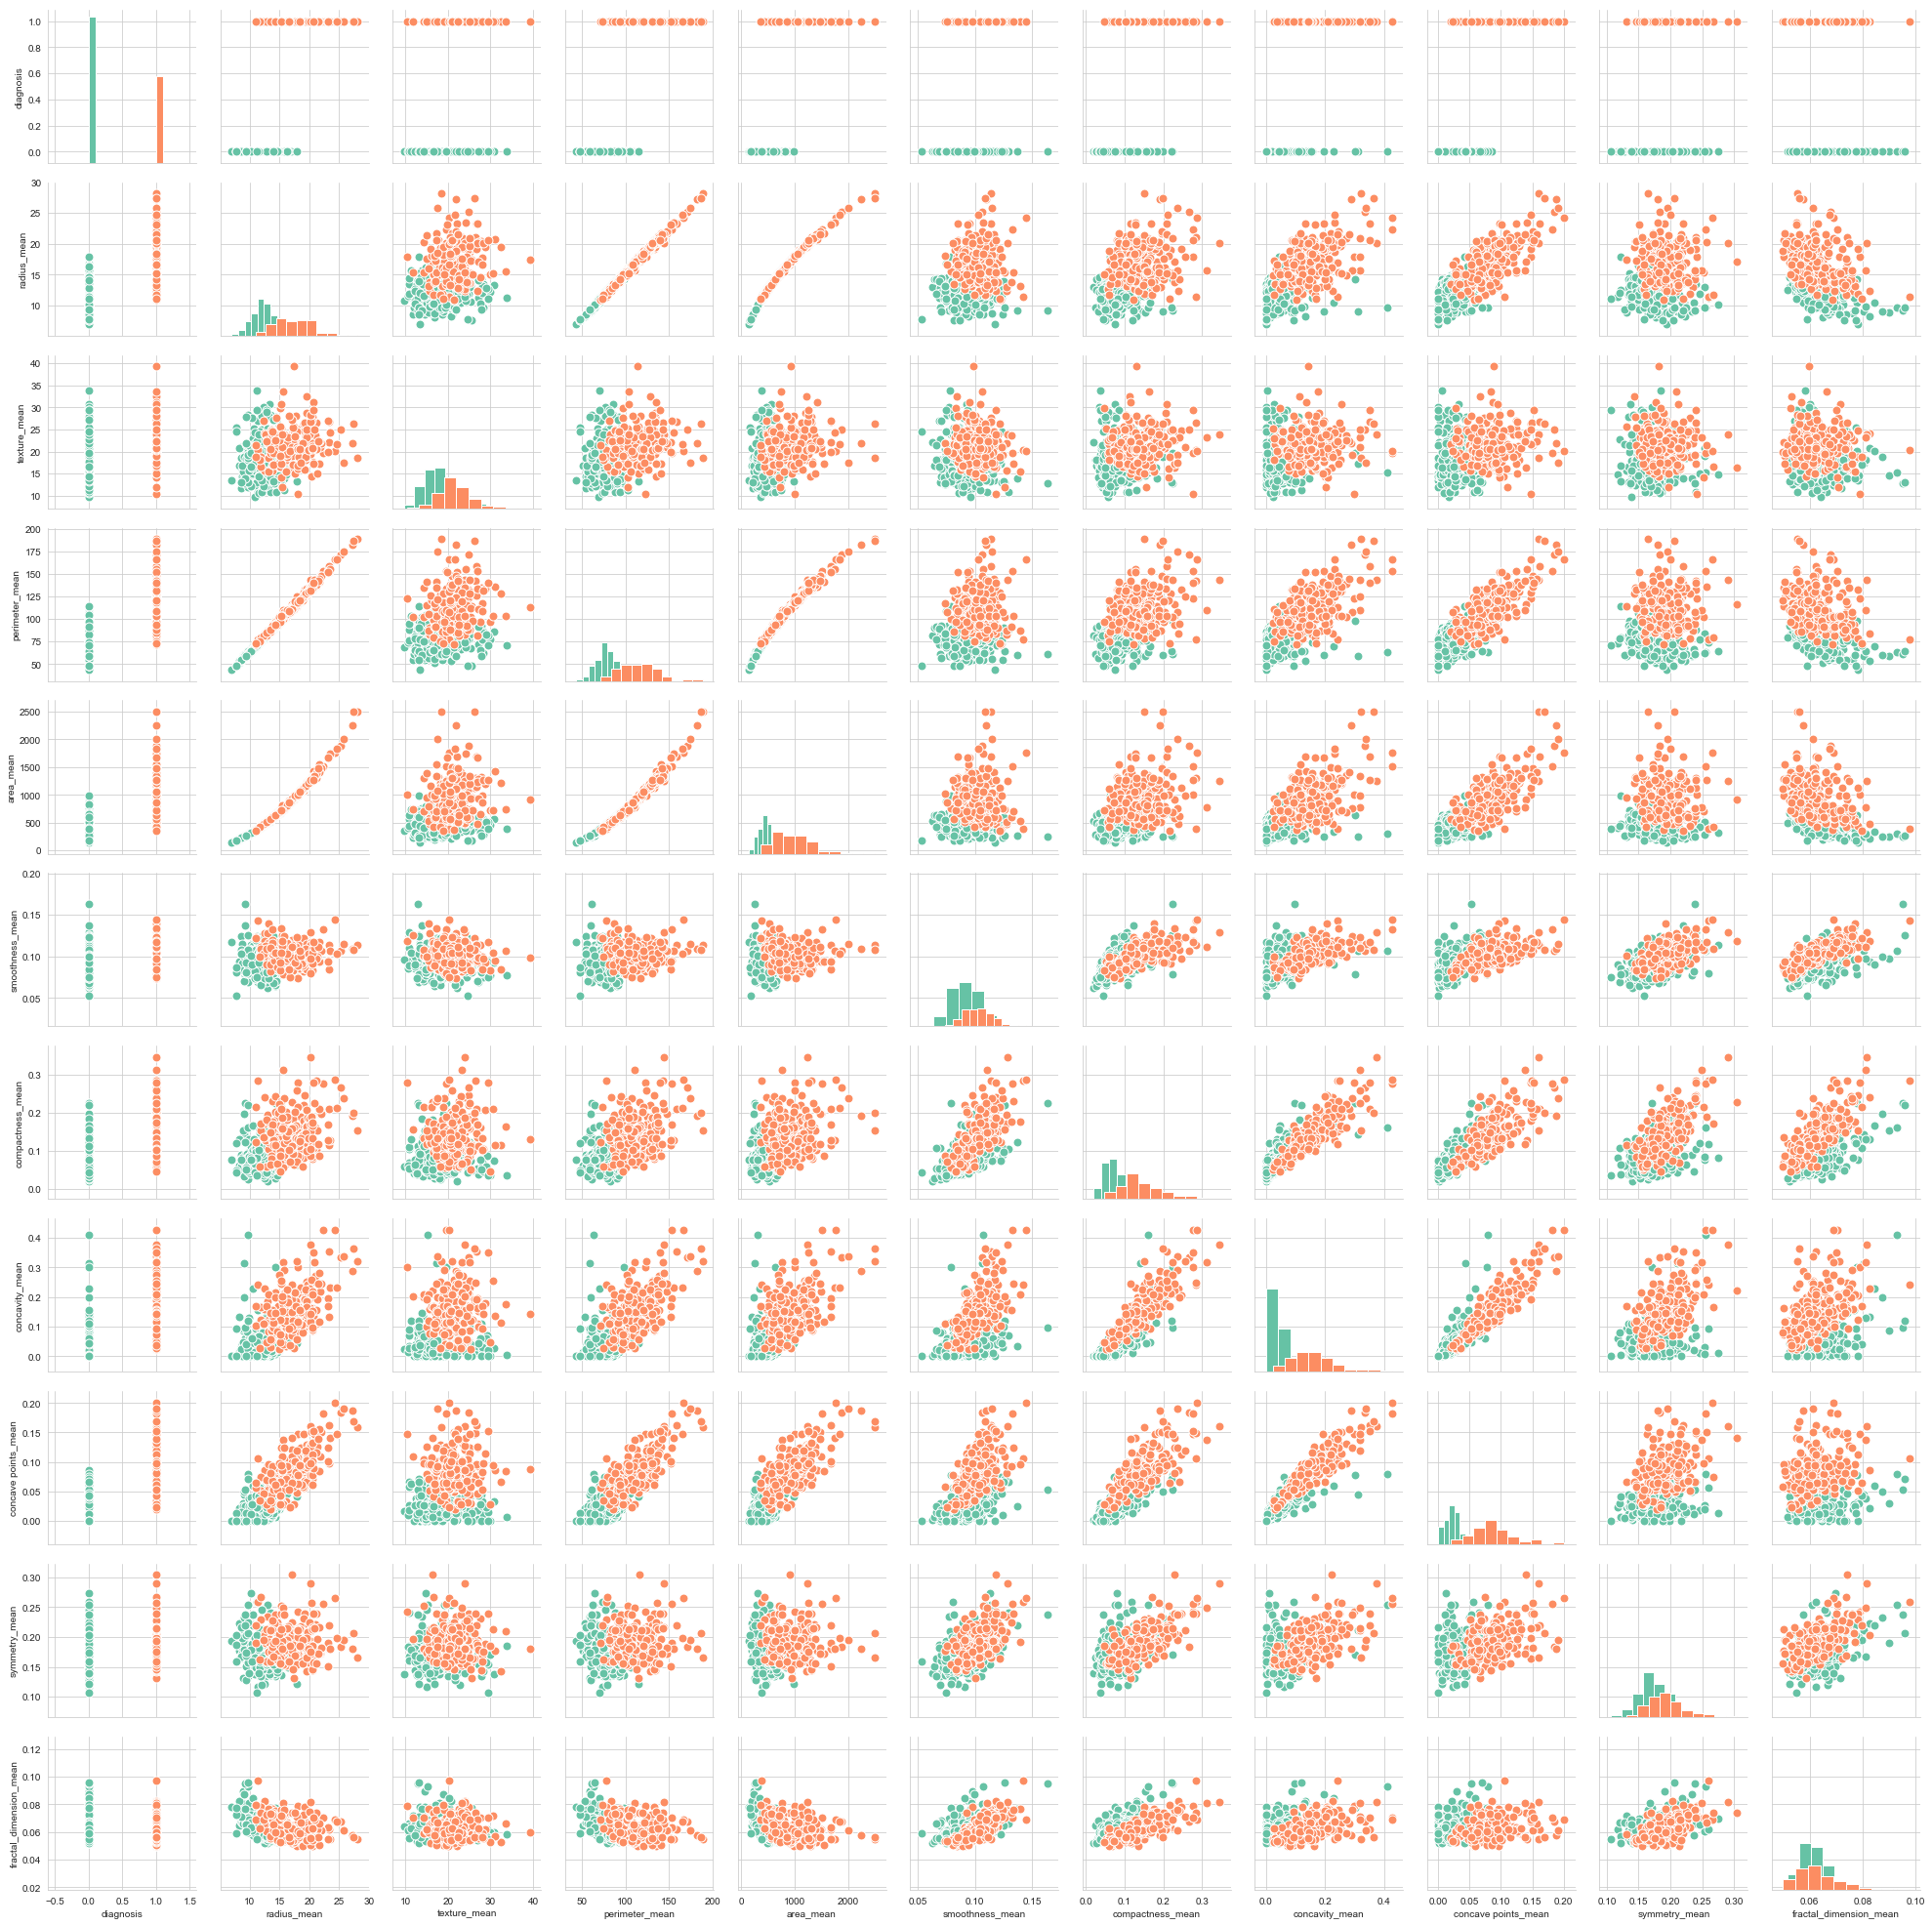

In [614]:
plt.figure(figsize=(5,5))
g = sns.PairGrid(cancer.iloc[:, 0:11], hue="diagnosis", palette="Set2")
g = g.map_diag(plt.hist, edgecolor="w")
g = g.map_offdiag(plt.scatter, edgecolor="w", s=80)
plt.show()

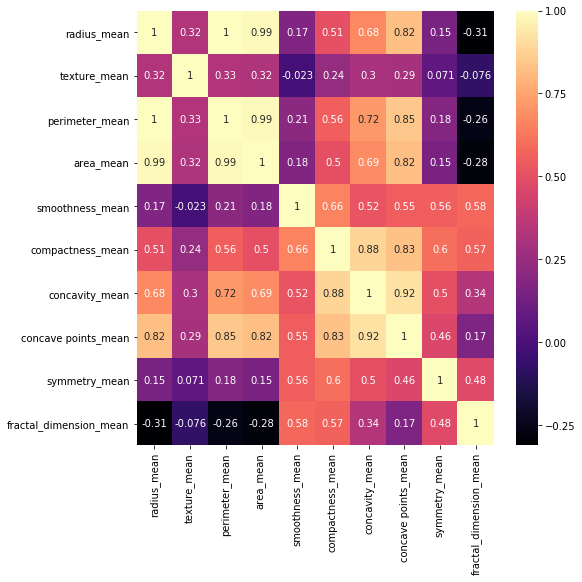

In [41]:
cancer_corr = cancer.iloc[:, 1:11].corr()
plt.figure(figsize=(8,8))
sns.heatmap(cancer_corr,annot=True,cmap="magma")
plt.show()

In [72]:
drop_cols=[]
for cols in cancer.columns:
    if cancer[cols].std()==0:
        drop_cols.append(cols)
print("Number of constant columns to be dropped: ", len(drop_cols))
print(drop_cols)
cancer.drop(drop_cols,axis=1, inplace = True)

Number of constant columns to be dropped:  0
[]


In [51]:
cancer['diagnosis'] = cancer['diagnosis'].map({'M':1,'B':0})
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# 3.Preparing X and Y Train and Test Sets

In [78]:
X = cancer.loc[:,cancer.columns != 'diagnosis']
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [79]:
Y= cancer.loc[:,cancer.columns == 'diagnosis']
Y.head()

,diagnosis
0,1
1,1
2,1
3,1
4,1


In [146]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [147]:
print(X_train.shape)
print(Y_train.shape)

(398, 30)
(398, 1)


In [148]:
print(X_test.shape)
print(Y_test.shape)

(171, 30)
(171, 1)


# 4.Fitting the Algorithm

In [390]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=10, scoring='neg_mean_squared_error')
    cv_scores.append(scores.mean())

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

<Figure size 432x288 with 0 Axes>

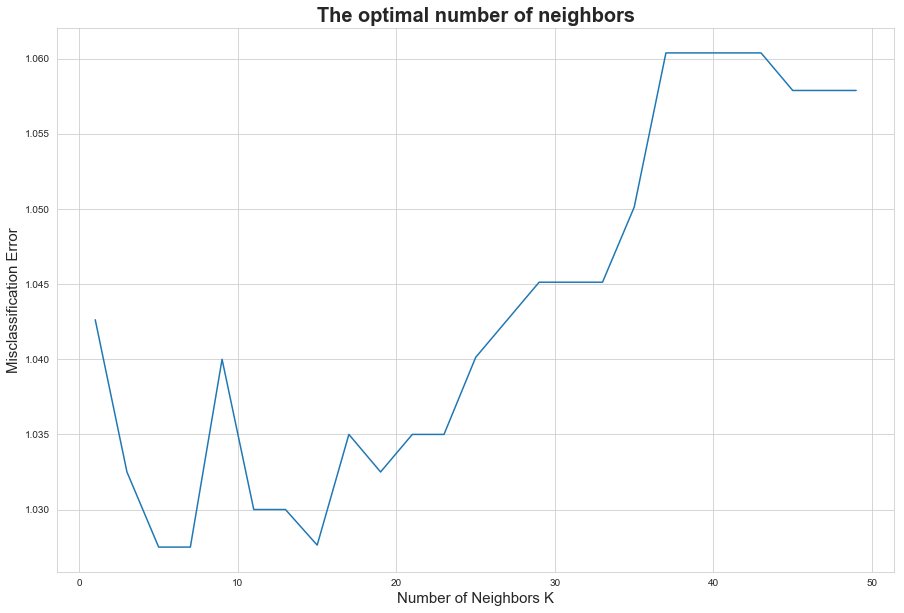

In [391]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [396]:
# finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 5.


In [573]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
classifier = KNeighborsClassifier(n_neighbors=5)
start_time = time.time()
classifier.fit(X_train, Y_train)
Y_pred_train= classifier.predict(X_train)
Y_pred_test= classifier.predict(X_test)
end_time = time.time()
time1 = end_time-start_time
print(time1)

0.05307364463806152


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [654]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(Y_train,Y_pred_train))

confusion_matrix.index = ['0','1']
confusion_matrix.columns = ['0','1']
print(confusion_matrix)

     0    1
0  247    2
1    4  145


In [655]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(Y_test,Y_pred_test))

confusion_matrix.index = ['0','1']
confusion_matrix.columns = ['0','1']
print(confusion_matrix)

     0   1
0  107   1
1    6  57


In [410]:
from sklearn.metrics import accuracy_score
print('Accuracy score for train data using KNN without PCA:', accuracy_score(Y_train,Y_pred_train))
print('Accuracy score for test data using KNN without PCA:', accuracy_score(Y_test,Y_pred_test))

from sklearn.metrics import precision_score
precision = precision_score(Y_test,Y_pred_test)
print('Precision score for test data using model1 is:', precision)
from sklearn.metrics import recall_score
print('Recall score for test data using model1 is:',recall_score(Y_test,Y_pred_test)) 

Accuracy score for train data using KNN without PCA: 0.9849246231155779
Accuracy score for test data using KNN without PCA: 0.9590643274853801
Precision score for test data using model1 is: 0.9827586206896551
Recall score for test data using model1 is: 0.9047619047619048


# 5. Applying PCA on Data set

In [658]:
from sklearn.decomposition import PCA
pca = PCA(30).fit(X)

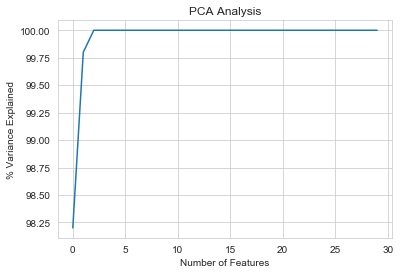

In [659]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
plt.ylabel('% Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Analysis')
plt.style.context('seaborn-whitegrid')
plt.plot(var)

# 6.Transforming X using MinMaxScaler and applying PCA on data set

In [422]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

np.set_printoptions(precision=2, suppress=True)

scaler = MinMaxScaler(feature_range=(0,1))
X_scaled = scaler.fit_transform(X)
print("Unscaled data\n", X_train)
print("\nScaled data\n", X_scaled)

Unscaled data
 [[-0.38  0.08 -0.16 ... -0.02  0.    0.02]
 [-0.62 -0.3   0.02 ... -0.04  0.    0.04]
 [-0.05 -0.12  0.06 ... -0.07  0.04 -0.02]
 ...
 [ 0.87  0.18  0.17 ... -0.13  0.06  0.08]
 [-0.34 -0.22  0.18 ... -0.    0.02  0.01]
 [-0.56 -0.25  0.08 ...  0.06  0.02  0.05]]

Scaled data
 [[0.52 0.02 0.55 ... 0.91 0.6  0.42]
 [0.64 0.27 0.62 ... 0.64 0.23 0.22]
 [0.6  0.39 0.6  ... 0.84 0.4  0.21]
 ...
 [0.46 0.62 0.45 ... 0.49 0.13 0.15]
 [0.64 0.66 0.67 ... 0.91 0.5  0.45]
 [0.04 0.5  0.03 ... 0.   0.26 0.1 ]]


In [423]:
from sklearn.decomposition import PCA
pca_scaled = PCA(30).fit(X_scaled)

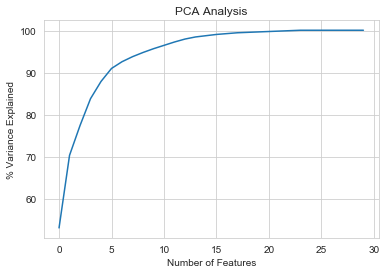

In [424]:
var=np.cumsum(np.round(pca_scaled.explained_variance_ratio_, decimals=3)*100)
plt.ylabel('% Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Analysis')
plt.style.context('seaborn-whitegrid')
plt.plot(var)

In [426]:
print('%d components explain 90%% of the variation in data' % pca.n_components_)
print('%d components explain 90%% of the variation in data' % pca_scaled.n_components_)

30 components explain 90% of the variation in data
30 components explain 90% of the variation in data


# 7.Applying PCA for KNN with n_components=15 for transformed X

In [554]:
pca = PCA(n_components=15, random_state = 0)
pca.fit(X_scaled)
X_15 = pca.transform(X_scaled)
print(X_15.shape)

(569, 15)


In [569]:
X_15 #Transformed Values of X

array([[ 1.39,  0.43, -0.54, ..., -0.04, -0.13, -0.14],
       [ 0.46, -0.56, -0.21, ...,  0.17, -0.05,  0.07],
       [ 0.95, -0.11, -0.15, ...,  0.01, -0.02,  0.04],
       ...,
       [ 0.23, -0.29,  0.32, ..., -0.04,  0.03,  0.03],
       [ 1.68,  0.34,  0.3 , ..., -0.15, -0.02,  0.01],
       [-0.91, -0.1 ,  0.38, ...,  0.01, -0.21, -0.06]])

In [555]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X_15, Y, test_size=0.30, random_state=0)

In [556]:
print(X1_train.shape)
print(X1_test.shape)

(398, 15)
(171, 15)


In [566]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
classifier = KNeighborsClassifier(n_neighbors=5)
start_time = time.time()
classifier.fit(X1_train, Y1_train)
Y1_pred_train = classifier.predict(X1_train)
Y1_pred_test = classifier.predict(X1_test)
end_time = time.time()
time2 = end_time-start_time
print(time2)

0.03762245178222656


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [567]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(Y1_test,Y1_pred_test))

confusion_matrix.index = ['0','1']
confusion_matrix.columns = ['0','1']
print(confusion_matrix)

     0   1
0  107   1
1    4  59


In [568]:
from sklearn.metrics import accuracy_score
print('Accuracy score for train data using KNN wtih PCA:', accuracy_score(Y1_train,Y1_pred_train))
print('Accuracy score for test data using KNN with PCA:', accuracy_score(Y1_test,Y1_pred_test))

from sklearn.metrics import precision_score
precision = precision_score(Y1_test,Y1_pred_test)
print('Precision score for test data using model1 is:', precision)
from sklearn.metrics import recall_score
print('Recall score for test data using model1 is:',recall_score(Y1_test,Y1_pred_test)) 

Accuracy score for train data using KNN wtih PCA: 0.9723618090452262
Accuracy score for test data using KNN with PCA: 0.9707602339181286
Precision score for test data using model1 is: 0.9833333333333333
Recall score for test data using model1 is: 0.9365079365079365


# 8.Model Selection

In [578]:
difference = time1-time2
print(difference)

0.015451192855834961


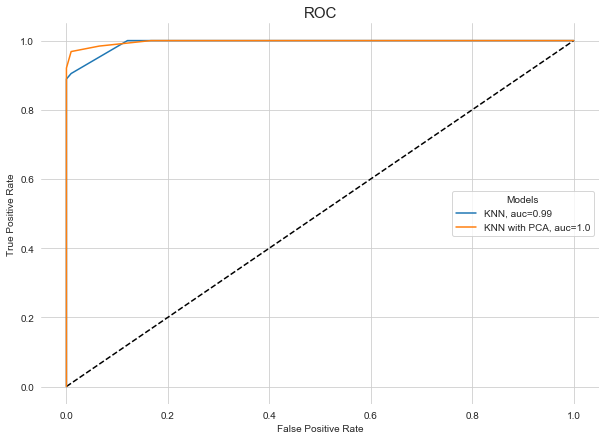

In [646]:
from sklearn import metrics
Y_pred_KNN =classifier.predict_proba(X_test)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(Y_test,Y_pred_KNN)
auc1 = metrics.roc_auc_score(Y_test,Y_pred_KNN)

Y_pred_KNN_PCA = classifier.predict_proba(X1_test)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(Y1_test,Y_pred_KNN_PCA)
auc2 = metrics.roc_auc_score(Y1_test,Y_pred_KNN_PCA)

plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1,tpr1,label="KNN, auc="+str(round(auc1,2)))
plt.plot(fpr2,tpr2,label="KNN with PCA, auc="+str(round(auc2,2)))
plt.legend(loc=5, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', size=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True);

In [612]:
p=X1_test
print(p[0:51])
print(p[51:101])
print(p[101:151])
print(p[151:172])

[[ 0.4   0.36  0.01 -0.26 -0.05  0.   -0.03 -0.09 -0.07  0.08  0.04  0.07
   0.08 -0.08  0.02]
 [-0.4  -0.25  0.33 -0.12 -0.05 -0.06 -0.05 -0.02 -0.04 -0.   -0.08  0.01
   0.    0.05 -0.  ]
 [-0.44 -0.33 -0.19 -0.01  0.13 -0.02 -0.05 -0.06 -0.07 -0.04  0.02  0.01
   0.01 -0.04  0.01]
 [-0.37 -0.36 -0.   -0.12  0.23  0.12  0.08 -0.02 -0.05 -0.   -0.   -0.05
  -0.01 -0.06 -0.01]
 [-0.56 -0.25  0.08  0.2   0.   -0.02 -0.11 -0.16  0.19  0.03  0.09  0.03
   0.06  0.02  0.05]
 [-0.37  0.13 -0.05 -0.05 -0.18  0.02 -0.12  0.05 -0.04 -0.01 -0.04  0.06
  -0.04  0.03 -0.03]
 [-0.24  0.07  0.25  0.11  0.49 -0.05  0.03 -0.02  0.09 -0.08  0.09  0.14
   0.07 -0.07 -0.  ]
 [-0.52 -0.02  0.09 -0.05 -0.13  0.19 -0.04 -0.01 -0.01  0.01  0.   -0.03
   0.04  0.   -0.03]
 [-0.78  0.28  0.38  0.06 -0.17  0.05  0.27  0.06 -0.08  0.   -0.13  0.03
   0.13 -0.16  0.04]
 [-0.51  0.37 -0.    0.41 -0.1  -0.14  0.03  0.14  0.2  -0.1   0.06 -0.11
  -0.03 -0.08 -0.02]
 [ 0.23  0.32 -0.23  0.27  0.04  0.01  0.11 -0.08 

In [579]:
Y1_pred_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0], dtype=int64)